In [440]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

dfs = [df_train, df_test]

In [441]:
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} : {}'.format(col, df[col].isnull().sum()))
    print('\n')
    
for df in dfs:
    display_missing(df)

PassengerId : 0
Survived : 0
Pclass : 0
Name : 0
Sex : 0
Age : 177
SibSp : 0
Parch : 0
Ticket : 0
Fare : 0
Cabin : 687
Embarked : 2


PassengerId : 0
Pclass : 0
Name : 0
Sex : 0
Age : 86
SibSp : 0
Parch : 0
Ticket : 0
Fare : 1
Cabin : 327
Embarked : 0




In [442]:
df_train.drop(['Cabin'], inplace=True, axis=1)
df_train.drop(['PassengerId'], inplace=True, axis=1)
df_train.drop(['Ticket'], inplace=True, axis=1)
df_train.drop(['Name'], inplace=True, axis=1)
df_train.drop(['SibSp'], inplace=True, axis=1)
df_train.drop(['Parch'], inplace=True, axis=1)
df_train.drop(['Fare'], inplace=True, axis=1)

In [443]:
# Filling the missing values in Age with the medians of Sex and Pclass groups
df_train['Age'] = df_train.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [444]:
df_train[df_train['Embarked'].isnull()]

Survived  Pclass     Sex   Age Embarked
61          1       1  female  38.0      NaN
829         1       1  female  62.0      NaN

In [445]:
df_train = df_train[df_train.Embarked.notnull()]

In [446]:
le = LabelEncoder()
df_train['Sex'] = le.fit_transform(df_train['Sex'])
df_train = pd.get_dummies(df_train, columns=['Embarked', 'Pclass'])
# df_train['Embarked'] = le.fit_transform(df_train['Embarked'])

/tmp/ipykernel_309/176003943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Sex'] = le.fit_transform(df_train['Sex'])


In [447]:
df_train.to_csv('data/train-embarked-null-dropped.csv')

---


In [448]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

dfs = [df_train, df_test]

df_train.drop(['Cabin'], inplace=True, axis=1)
df_train.drop(['PassengerId'], inplace=True, axis=1)
df_train.drop(['Ticket'], inplace=True, axis=1)
df_train.drop(['Name'], inplace=True, axis=1)
df_train.drop(['SibSp'], inplace=True, axis=1)
df_train.drop(['Parch'], inplace=True, axis=1)
df_train.drop(['Fare'], inplace=True, axis=1)
df_train['Age'] = df_train.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

df_train.drop(['Embarked'], inplace=True, axis=1)
# df_train['Sex'] = le.fit_transform(df_train['Sex'])
# df_train['Sex'] = ~df_train['Sex']
le = LabelEncoder()
df_train['Sex'] = le.fit_transform(df_train['Sex'])
df_train = pd.get_dummies(df_train, columns=['Pclass'])

In [449]:
df_train.to_csv('data/train-final.csv')

---


In [450]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

df_train1 = pd.read_csv('data/train-embarked-null-dropped.csv', index_col=0)
df_train2 = pd.read_csv('data/train-no-embarked.csv', index_col=0)
df_test = pd.read_csv('data/test.csv')

In [451]:

df_train1.sample(10)

Survived  Sex    Age  Embarked_C  Embarked_Q  Embarked_S  Pclass_1  \
139         0    1  24.00           1           0           0         1   
250         0    1  25.00           0           0           1         0   
18          0    0  31.00           0           0           1         0   
156         1    0  16.00           0           1           0         0   
871         1    0  47.00           0           0           1         1   
831         1    1   0.83           0           0           1         0   
241         1    0  21.50           0           1           0         0   
433         0    1  17.00           0           0           1         0   
175         0    1  18.00           0           0           1         0   
366         1    0  60.00           1           0           0         1   

     Pclass_2  Pclass_3  
139         0         0  
250         0         1  
18          0         1  
156         0         1  
871         0         0  
831         1         0  
241         0         1  
433         0         1  
175         0         1  
366         0         0

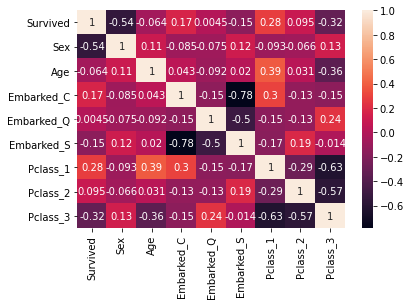

In [452]:
import seaborn as sns
import matplotlib.pyplot as plt


# df_train1['Embarked'] = OneHotEncoder().fit_transform(df_train1['Embarked'])


df_train1.head()
sns.heatmap(df_train1.corr(), annot=True)
plt.show()

In [453]:
df_train1.head()

Survived  Sex   Age  Embarked_C  Embarked_Q  Embarked_S  Pclass_1  \
0         0    1  22.0           0           0           1         0   
1         1    0  38.0           1           0           0         1   
2         1    0  26.0           0           0           1         0   
3         1    0  35.0           0           0           1         1   
4         0    1  35.0           0           0           1         0   

   Pclass_2  Pclass_3  
0         0         1  
1         0         0  
2         0         1  
3         0         0  
4         0         1

In [454]:
df_underage = df_train1[df_train1.Age < 18]
df_underage.count()

Survived      113
Sex           113
Age           113
Embarked_C    113
Embarked_Q    113
Embarked_S    113
Pclass_1      113
Pclass_2      113
Pclass_3      113
dtype: int64

In [455]:
df_underage.sum()

Survived        61.00
Sex             58.00
Age           1021.67
Embarked_C      24.00
Embarked_Q       7.00
Embarked_S      82.00
Pclass_1        12.00
Pclass_2        23.00
Pclass_3        78.00
dtype: float64

In [456]:
df_adult = df_train1[df_train1.Age > 18] 
df_adult.sum()

Survived        270.0
Sex             506.0
Age           24349.5
Embarked_C      140.0
Embarked_Q       69.0
Embarked_S      541.0
Pclass_1        198.0
Pclass_2        155.0
Pclass_3        397.0
dtype: float64

In [457]:
sns.heatmap(df_adult.corr(), annot=True)
plt.show()

Taux de survie chez les moins de 18 ans: 53.9%

Taux de survie global: 36%

In [458]:
df_train2.head()

Survived  Sex   Age  Pclass_1  Pclass_2  Pclass_3
0         0    1  22.0         0         0         1
1         1    0  38.0         1         0         0
2         1    0  26.0         0         0         1
3         1    0  35.0         1         0         0
4         0    1  35.0         0         0         1